In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Test Chang's representation of the soot F(C) profile.
This is an infinite sum, so at a given point, look at the variation of F with n.

[  2.42800145e+01   8.84196901e+00   4.01517539e+00   2.07719812e+00
   1.16934463e+00   6.97843964e-01   4.34449464e-01   2.79203360e-01
   1.83899434e-01   1.23510361e-01   8.42693811e-02   5.82458139e-02
   4.06964964e-02   2.86958882e-02   2.03927430e-02   1.45901710e-02
   1.05001393e-02   7.59569036e-03   5.51971478e-03   4.02739565e-03
   2.94920243e-03   2.16670035e-03   1.59650613e-03   1.17950980e-03
   8.73551950e-04   6.48398346e-04   4.82260379e-04   3.59366429e-04
   2.68254619e-04   2.00564921e-04   1.50179586e-04   1.12608231e-04
   8.45458338e-05   6.35536552e-05   4.78279627e-05   3.60318059e-05
   2.71722367e-05   2.05104280e-05   1.54956891e-05   1.17168973e-05
   8.86666563e-06   6.71484399e-06   5.08888566e-06   3.85926947e-06
   2.92865911e-06   2.22382393e-06   1.68961368e-06   1.28445326e-06
   9.76971971e-07   7.43478816e-07   5.66067753e-07   4.31193754e-07
   3.28603669e-07   2.50530323e-07   1.91085816e-07   1.45804234e-07
   1.11295613e-07   8.49860304e-08

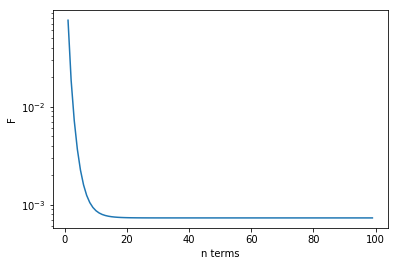

In [60]:
Tg = 1000.0           # K
Tb = 1000.0           # K
P  = 101325.0         # Pa
fv = 1E-6             # m3/m3
C  = 0.01            # m2/mol

Rg    = 8.31446       # J/mol*K
hCokb = 0.01438777354 # m*K
c     = 7.0
N     = P/Rg/Tg       # mol/m3

x = hCokb*C*N/c/fv/Tb

n = np.arange(1,100)

S = np.exp(-n*x)/n**4*( n*x*(n*x*(n*x+3)+6)+6 )
S = np.cumsum(S)
F = 1.0-15/np.pi**4*S

plt.semilogy(n,F)
plt.xlabel('n terms')
plt.ylabel('F')

err = np.abs(F[1:]-F[-1])/F[-1]
print(err)

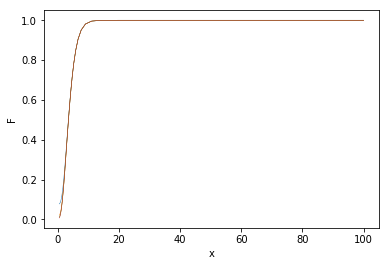

In [59]:
def FF(x, N):
    n = np.arange(1,N+1)
    S = np.exp(-n*x)/n**4*( n*x*(n*x*(n*x+3)+6)+6 )
    return 1.0-15/np.pi**4*np.sum(S)

xinv = np.linspace(0.01,2.0,100)
x = 1.0/xinv
y1 = np.empty(100)
y2 = np.empty(100)
y3 = np.empty(100)
y4 = np.empty(100)

for i,xx in enumerate(x):
    y1[i] = FF(xx,1)
    y2[i] = FF(xx,2)
    y3[i] = FF(xx,3)
    y4[i] = FF(xx,4)

plt.plot(x,y1, linewidth=0.5)
plt.plot(x,y2, linewidth=0.5)
plt.plot(x,y3, linewidth=0.5)
plt.plot(x,y4, linewidth=0.5)
plt.xlabel('x')    
plt.ylabel('F')